# 3-Layer DNN

This notebook implements a 3-layer neural network with two hidden layers for binary classification. Below are the key components and equations that define the model.


## Data and Activations
- **Data**: Synthetic data with \( X \in \mathbb{R}^{2 \times 400} \) and \( y \in \mathbb{R}^{1 \times 400} \), same as the 1-layer model.
- **ReLU Activation**: Used for hidden layers to introduce nonlinearity:
  \[
  \text{ReLU}(z) = \max(0, z)
  \]
- **Sigmoid Activation**: Used for the output layer:
  \[
  \sigma(z) = \frac{1}{1 + e^{-z}}
  \]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.randn(2, 400)
y = np.where(X[0, :] + X[1, :] > 0, 1, 0).reshape(1, 400)

In [2]:
# Sigmoid and ReLU activations
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

## Parameter Initialization
Initialize weights and biases for three layers:
- **Layer 1 (Hidden)**: \( W_1 \in \mathbb{R}^{n_{h1} \times n_x} \), \( b_1 \in \mathbb{R}^{n_{h1} \times 1} \), with \( n_{h1} = 4 \).
- **Layer 2 (Hidden)**: \( W_2 \in \mathbb{R}^{n_{h2} \times n_{h1}} \), \( b_2 \in \mathbb{R}^{n_{h2} \times 1} \), with \( n_{h2} = 3 \).
- **Layer 3 (Output)**: \( W_3 \in \mathbb{R}^{n_y \times n_{h2}} \), \( b_3 \in \mathbb{R}^{n_y \times 1} \), with \( n_y = 1 \).

In [3]:
# Initialize parameters
def initialize_parameters_3layer(n_x, n_h1, n_h2, n_y):
    W1 = np.random.randn(n_h1, n_x) * 0.01
    b1 = np.zeros((n_h1, 1))
    W2 = np.random.randn(n_h2, n_h1) * 0.01
    b2 = np.zeros((n_h2, 1))
    W3 = np.random.randn(n_y, n_h2) * 0.01
    b3 = np.zeros((n_y, 1))
    return W1, b1, W2, b2, W3, b3

## Forward Propagation
Compute the activations through three layers:
\[
Z_1 = W_1 X + b_1, \quad A_1 = \text{ReLU}(Z_1)
\]
\[
Z_2 = W_2 A_1 + b_2, \quad A_2 = \text{ReLU}(Z_2)
\]
\[
Z_3 = W_3 A_2 + b_3, \quad A_3 = \sigma(Z_3)
\]
- Each layer applies a linear transformation followed by an activation function.


In [4]:
# Forward propagation
def forward_propagation_3layer(X, W1, b1, W2, b2, W3, b3):
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    return A1, A2, A3

## Cost Function
Binary cross-entropy loss:
\[
J = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log(A_3^{(i)}) + (1 - y^{(i)}) \log(1 - A_3^{(i)}) \right]
\]


In [5]:
# Compute cost
def compute_cost_3layer(A3, y):
    m = y.shape[1]
    cost = -np.sum(y * np.log(A3) + (1 - y) * np.log(1 - A3)) / m
    return cost

## Backward Propagation
Backpropagate the errors through the layers:
\[
dZ_3 = A_3 - y
\]
\[
dW_3 = \frac{1}{m} dZ_3 A_2^T, \quad db_3 = \frac{1}{m} \sum_{i=1}^m dZ_3^{(i)}
\]
\[
dZ_2 = W_3^T dZ_3 \cdot \text{ReLU}'(Z_2)
\]
\[
dW_2 = \frac{1}{m} dZ_2 A_1^T, \quad db_2 = \frac{1}{m} \sum_{i=1}^m dZ_2^{(i)}
\]
\[
dZ_1 = W_2^T dZ_2 \cdot \text{ReLU}'(Z_1)
\]
\[
dW_1 = \frac{1}{m} dZ_1 X^T, \quad db_1 = \frac{1}{m} \sum_{i=1}^m dZ_1^{(i)}
\]
- **ReLU derivative**: \( \text{ReLU}'(z) = 1 \) if \( z > 0 \), else 0.


In [6]:
# Backward propagation
def backward_propagation_3layer(X, y, A1, A2, A3, W2, W3):
    m = X.shape[1]
    dZ3 = A3 - y
    dW3 = np.dot(dZ3, A2.T) / m
    db3 = np.sum(dZ3, axis=1, keepdims=True) / m
    dZ2 = np.dot(W3.T, dZ3) * (A2 > 0)  # ReLU derivative
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.dot(W2.T, dZ2) * (A1 > 0)  # ReLU derivative
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    return dW1, db1, dW2, db2, dW3, db3

## Parameter Update
Update the weights and biases for all layers:
\[
W_l = W_l - \alpha dW_l, \quad b_l = b_l - \alpha db_l \quad \text{for } l = 1, 2, 3
\]

In [7]:
# Update parameters
def update_parameters_3layer(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, learning_rate):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3
    return W1, b1, W2, b2, W3, b3

## Training the Model
The model is trained by iteratively performing forward propagation, computing the cost, performing backward propagation, and updating the parameters for a specified number of epochs.

In [10]:
# Train 3-layer DNN
def train_three_layer(X, y, n_h1, n_h2, learning_rate=0.01, epochs=3000):
    n_x, n_y = X.shape[0], y.shape[0]
    W1, b1, W2, b2, W3, b3 = initialize_parameters_3layer(n_x, n_h1, n_h2, n_y)
    costs = []
    
    for i in range(epochs):
        A1, A2, A3 = forward_propagation_3layer(X, W1, b1, W2, b2, W3, b3)
        cost = compute_cost_3layer(A3, y)
        dW1, db1, dW2, db2, dW3, db3 = backward_propagation_3layer(X, y, A1, A2, A3, W2, W3)
        W1, b1, W2, b2, W3, b3 = update_parameters_3layer(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, learning_rate)
        if i % 100 == 0:
            costs.append(cost)
            print(f"Cost after iteration {i}: {cost}")
    
    return W1, b1, W2, b2, W3, b3, costs

## Cost Reduction Plot
After training, a plot of the cost over iterations is displayed to visualize the model's learning progress.

Cost after iteration 0: 0.6931471115114373
Cost after iteration 100: 0.6927483243181081
Cost after iteration 200: 0.6925065905559893
Cost after iteration 300: 0.6923600397354306
Cost after iteration 400: 0.6922711820252822
Cost after iteration 500: 0.6922172981231679
Cost after iteration 600: 0.6921846184479079
Cost after iteration 700: 0.6921647964028748
Cost after iteration 800: 0.6921527717981494
Cost after iteration 900: 0.6921454763755526
Cost after iteration 1000: 0.6921410494676219
Cost after iteration 1100: 0.6921383625899443
Cost after iteration 1200: 0.6921367312638267
Cost after iteration 1300: 0.6921357402971754
Cost after iteration 1400: 0.6921351378125276
Cost after iteration 1500: 0.6921347710080132
Cost after iteration 1600: 0.6921345471813055
Cost after iteration 1700: 0.6921344100894871
Cost after iteration 1800: 0.6921343256116897
Cost after iteration 1900: 0.6921342730445076
Cost after iteration 2000: 0.6921342398238753
Cost after iteration 2100: 0.692134218327332
C

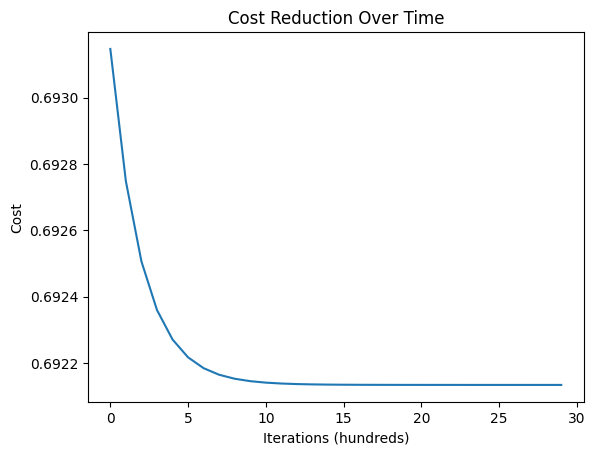

In [11]:
# Run the model
n_h1, n_h2 = 4, 3  # 4 units in first layer, 3 in second
W1, b1, W2, b2, W3, b3, costs = train_three_layer(X, y, n_h1, n_h2)
plt.plot(costs)
plt.xlabel('Iterations (hundreds)')
plt.ylabel('Cost')
plt.title('Cost Reduction Over Time')
plt.show()